SVM
- Load ‘load_breast_cancer’ dataset from sklearn.datasets.
- Print the names of the features.
- Print the names of the labels.
- Print the shape of the data.
- Check the top 5 records of the feature set.
- Print the cancer labels for the target set.
- Split the data (70% training).
- Create an svm classifier.
- Train the model using the training dataset.
- Predict the response for test dataset.
- Evaluate the model with the ‘metrics’ class specifying the ‘precision’ and ‘recall’ metrics.
- What does the recall metric imply?

Logistic Regression
- Use the same dataset for a Logistic Regression (CV) model.
- Use the same process as for the SVM.
- Generate the classification report.
- Generate the confusion matrix.
- Generate the area under the curve.

In [1]:
import csv
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [3]:
# Load ‘load_breast_cancer’ dataset from sklearn.datasets.
data = load_breast_cancer()

In [4]:
# Print the names of the features, labels, and data's shape
print(data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
#These are the features
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
#These are the labels
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [8]:
# This is the shape of the data
df.shape

(569, 30)

In [9]:
# Check top 5 of the feature set
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# Print cancer label for the target set
df['cancer']=data.target
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
# Split the data, 70% training set
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


In [12]:
#Create the SVM classifier model
classifier = SVC(kernel = 'linear', random_state = 0)
#Fit the model for the data
classifier.fit(X_train, y_train)
#Make the prediction
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [13]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', confusion[::-1,::1])

Confusion Matrix: 
 [[  2 106]
 [ 59   4]]


In [14]:
print('Classification Report: \n',classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Evaluate the model with the ‘metrics’ class specifying the ‘precision’ and ‘recall’ metrics. What does the recall metric imply? 
<br>
- precision is  97% positive prediction are correct (true positive). It is this fraction of relevant instances.  
- recall or sensitivity is 94% positive cases the classifier correctly predicted over all the positive cases in the data. It is a fraction of total relevant results correctly classifiedc by the algorithm 



In [15]:
import numpy as np 

In [16]:
# Using the Logistic Regression
# We scale the data in the range [-1,1]
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)
lr = LogisticRegression(max_iter=2000)
cv_performance_lr = cross_val_score(lr, X_train, y_train, cv=10)
test_performance_lr = lr.fit(X_train, y_train).score(X_test, y_test)
print ('Cross-validation accuracy score: %0.3f,'
' test accuracy score: %0.3f'
% (np.mean(cv_performance_lr),test_performance_lr))

Cross-validation accuracy score: 0.972, test accuracy score: 0.988


In [17]:

param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100]}
grid = GridSearchCV(lr, param_grid, scoring="roc_auc", cv=5)
lr_train = grid.fit(X_train, y_train)
pred_lr = lr_train.predict(X_test)
confusion = confusion_matrix(y_test, pred_lr)
print('Confusion Matrix: \n', confusion[::-1,::1])

Confusion Matrix: 
 [[  2 106]
 [ 61   2]]


In [18]:
# Generate the classification report
print('Classification Report: \n',classification_report(y_test, pred_lr))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



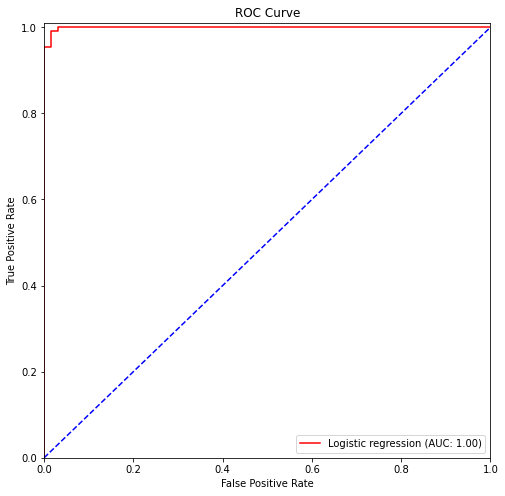

In [19]:
# Generate the area under the curve.
# Receiver Operating Curve (ROC)
Y_scores = lr.decision_function(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(pred_lr, Y_scores)
# Area Under the Curve (AUC)
from sklearn.metrics import auc
auc(fpr, tpr)
# ROC curve with Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='red', label='Logistic regression (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

ROC Curve is good because it is way above the middle and closer to the edge of the better performance area.